# Kings County Dataset

The Kings County dataset contains house sale prices for Kings County in Seattle. It includes homes sold between May 2014 and May 2015. Alongside sale price, dataset also contains various attributes of each house sold such as number of rooms, square foot and location.

This notebooks aims to answer the below questions:
    1. What are the top 6 house features that are the most important in determining house prices
    2. How much in avg. is the price difference between waterfront houses and non-waterfront houses
    3. How have avg. house prices faired the last 12 months and when is the best time of the year to sell?
    4. Identify the avg. price and transactions per zipcode. Determine if there's any relationship between them
    
Ahead of trying to answer any of the above questions, it is important to conduct the following:
- Import the necessary libraries
- Remove missing values 
- Introduce / manipulate new or existing columns
- Explore various attributes of the dataset
- Remove missing values and potentially outliers

Let's start by importing the necesary python packages for data manipulation and vizualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as ticker
import seaborn as sns
from kings_county_functions import *

%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
%load_ext autoreload
%autoreload 2

Assign the url of the Kings County dataset to a variable called 'url'.

Import the csv dataset using pandas' 'read_csv' method and use the 'parse_dates' argument to convert the 'date' column from a 'str' to a 'datetime' object

In [3]:
url = 'https://raw.githubusercontent.com/Ftan91/Project-1---Kings-County-House-Dataset/master/kc_house_data.csv'
df = pd.read_csv(url, parse_dates = ['date'])

Now, print the first 5 rows of the dataframe to check if the data has been uploaded successfully

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,"221,900.00",3,1.00,1180,5650,1.00,nan,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,"538,000.00",3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,"1,991.00",98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,"180,000.00",2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,"604,000.00",4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,"510,000.00",3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


Great! Now to understand the shape of the dataset, print out the dataframe's shape attribute

In [5]:
original_shape = df.shape
print ('Rows: {}'.format(original_shape[0]))
print ('Columns: {} '.format(original_shape[1]))

Rows: 21597
Columns: 21 


Let's start the data cleaning by checking for duplicates and dropping them. Use the dataframe's 'drop_duplicates' method by passing the 'id' column as the subset argument. This checks for any duplicates in id column.

Note: Duplicates in this column could be either:
- house that have been sold twice in the last twelve months or;
- error entry

To simplify future analysis, let's just drop them.

In [6]:
df = df.drop_duplicates(subset = 'id')

print ('Total number of rows dropped: {}'.format(original_shape[0] - df.shape[0]))

Total number of rows dropped: 177


Rather than using the .info() method, let's use the 'data_quality_summary' function as defined above to print the summary information for each column including missing values, number of datatypes for each column.

Whilst, df.info() might execute this as well, it is not particularly useful for calculating the number of datatype entries in the column. For example, a single column might have both 'str'and 'int64' datatype, however df.info() will only output 'str' as the datatype which is incorrect.

In [7]:
data_quality_summary(df)

,Feature,Null Entries,No. of unique datatype(s),Feature datatype(s),"Min, Max"
0,id,0,1,[<class 'numpy.int64'>],"(1000102, 9900000190)"
1,date,0,1,[<class 'numpy.datetime64'>],"(2014-05-02 00:00:00, 2015-05-27 00:00:00)"
2,price,0,1,[<class 'numpy.float64'>],"(78000.0, 7700000.0)"
3,bedrooms,0,1,[<class 'numpy.int64'>],"(1, 33)"
4,bathrooms,0,1,[<class 'numpy.float64'>],"(0.5, 8.0)"
5,sqft_living,0,1,[<class 'numpy.int64'>],"(370, 13540)"
6,sqft_lot,0,1,[<class 'numpy.int64'>],"(520, 1651359)"
7,floors,0,1,[<class 'numpy.float64'>],"(1.0, 3.5)"
8,waterfront,2353,1,[<class 'numpy.float64'>],"(0.0, 1.0)"
9,view,63,1,[<class 'numpy.float64'>],"(0.0, 4.0)"


As per above, there are clearly some data quality issues here; 
 - the waterfront, view and yr_renovated columns all have multiple null entries
 - the sqft_basement column is of the incorrect 'str' datatype
 - the sqft_basement has incorrect '?' row entries

Let's fix this using the 'null_filler'function as defined above.

In [10]:
missing_values_column = ['yr_renovated', 'waterfront', 'view', 'sqft_basement']

for column in missing_values_column:
    df[column] = df[column].map(lambda x: null_filler(df, column) if (pd.isnull(x) or x == '?') else x)

Next, convert the 'sqft_basement' column into an 'int64' datatype.

In [11]:
df['sqft_basement'] = df['sqft_basement'].map(lambda x: int(float(x)))

All 3 data quality issues above should now be resolved. Let's recheck our dataset again to confirm our changes.

In [12]:
data_quality_summary(df)

,Feature,Null Entries,No. of unique datatype(s),Feature datatype(s),"Min, Max"
0,id,0,1,[<class 'numpy.int64'>],"(1000102, 9900000190)"
1,date,0,1,[<class 'numpy.datetime64'>],"(2014-05-02 00:00:00, 2015-05-27 00:00:00)"
2,price,0,1,[<class 'numpy.float64'>],"(78000.0, 7700000.0)"
3,bedrooms,0,1,[<class 'numpy.int64'>],"(1, 33)"
4,bathrooms,0,1,[<class 'numpy.float64'>],"(0.5, 8.0)"
5,sqft_living,0,1,[<class 'numpy.int64'>],"(370, 13540)"
6,sqft_lot,0,1,[<class 'numpy.int64'>],"(520, 1651359)"
7,floors,0,1,[<class 'numpy.float64'>],"(1.0, 3.5)"
8,waterfront,0,1,[<class 'numpy.float64'>],"(0.0, 1.0)"
9,view,0,1,[<class 'numpy.float64'>],"(0.0, 4.0)"


Great! Now let's investigate some of the columns. Given there are various columns with the unit 'sqft', it may be worth checking if there are any inconsistencies between them.

Let's take a look at all 'sqft' columns.

In [13]:
sqft_columns = ['sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement']
df[sqft_columns].head()

,sqft_lot,sqft_living,sqft_above,sqft_basement
0,5650,1180,1180,0
1,7242,2570,2170,400
2,10000,770,770,0
3,5000,1960,1050,910
4,8080,1680,1680,0


It looks like the 'sqft_living' column is the sum of 'sqft_above' and 'sqft_basement' columns. 

Let's further sense check if all rows in the 'sqft_living' column are summed up correctly and drop those which are not.

In [14]:
to_drop = df[df['sqft_living'] != df['sqft_above'] + df['sqft_basement']].index
df.drop(to_drop, axis = 0, inplace = True)

Moving on to the 'sqft_lot' column, a simple google search gives the breakdown of: 

> sqft_lot = sqft_living + yard space

As such, let's drop any incorrect rows where sqft_living > sqft_lot

In [15]:
to_drop2 = df[sqft_columns][df.sqft_living > df.sqft_lot].index
df.drop(to_drop2, axis = 0, inplace = True)

print ('Total number of rows dropped so far: {}'.format(original_shape[0] - df.shape[0]))
print ("This figure includes duplicates entries dropped earlier and the dropped rows from the above 'sqft' checks.")

Total number of rows dropped so far: 1221
This figure includes duplicates entries dropped earlier and the dropped rows from the above 'sqft' checks.


Now that we've cleaned the dataset, let's start introducing some new columns which might potentially be useful for answering the 4 questions that were previously laid out. This is also known as the 'feature engineering' process. We can also introduce external data for better analysis, but let's leave that for future projects. Introducing 4 new columns:
- 'month_sold' - to idenfity any trends between month sold and price
- 'day_sold' - to idenfity any trends between day sold and price 
- 'binned_sqft_living' - for better visualization down the line / checking for outliers
- 'binned_sqft_above' - for better visualization down the line / checking for outliers
- 'binned_sqft_living15' - for better visualization down the line / checking for outliers
- 'house_age' - to identify the house age (2016 -  (yr_renovated or yr_built if yr_renovated == 0))

In [16]:
df['month_sold'] = df['date'].dt.month 
df['day_sold'] = df['date'].dt.dayofweek

df['binned_sqft_living'] = pd.qcut(df['sqft_living'], q = 10) # splits the dataset into 10 equal sized bins
df['binned_sqft_above'] = pd.qcut(df['sqft_above'], q = 10) # same as above
df['binned_sqft_living15'] = pd.qcut(df['sqft_living15'], q = 10) # same as above

df['price_per_sqft_living'] = df['price'] / df['sqft_living']

df['yr_built_vs_reno'] = df.apply(lambda row: year_value(row), axis = 1) # only a column for the below
df['house_age'] = 2016 - df['yr_built_vs_reno']

Check if the new columns have indeed been introduced.

In [17]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month_sold', 'day_sold',
       'binned_sqft_living', 'binned_sqft_above', 'binned_sqft_living15',
       'price_per_sqft_living', 'yr_built_vs_reno', 'house_age'],
      dtype='object')

Ahead of visualizing the variable distributions, let's split the columns into 'continuous' and 'ordinal_and_categorical' for better visualization.

In [18]:
continuous = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'house_age']
ordinal_and_categorical = ['grade', 'condition', 'floors', 'view', 'waterfront']

Now, let's plot a pairplot for 'continuous' variables and barcharts for 'ordinal_and_categorical' to get a sense of  variable distributions and check for outliers

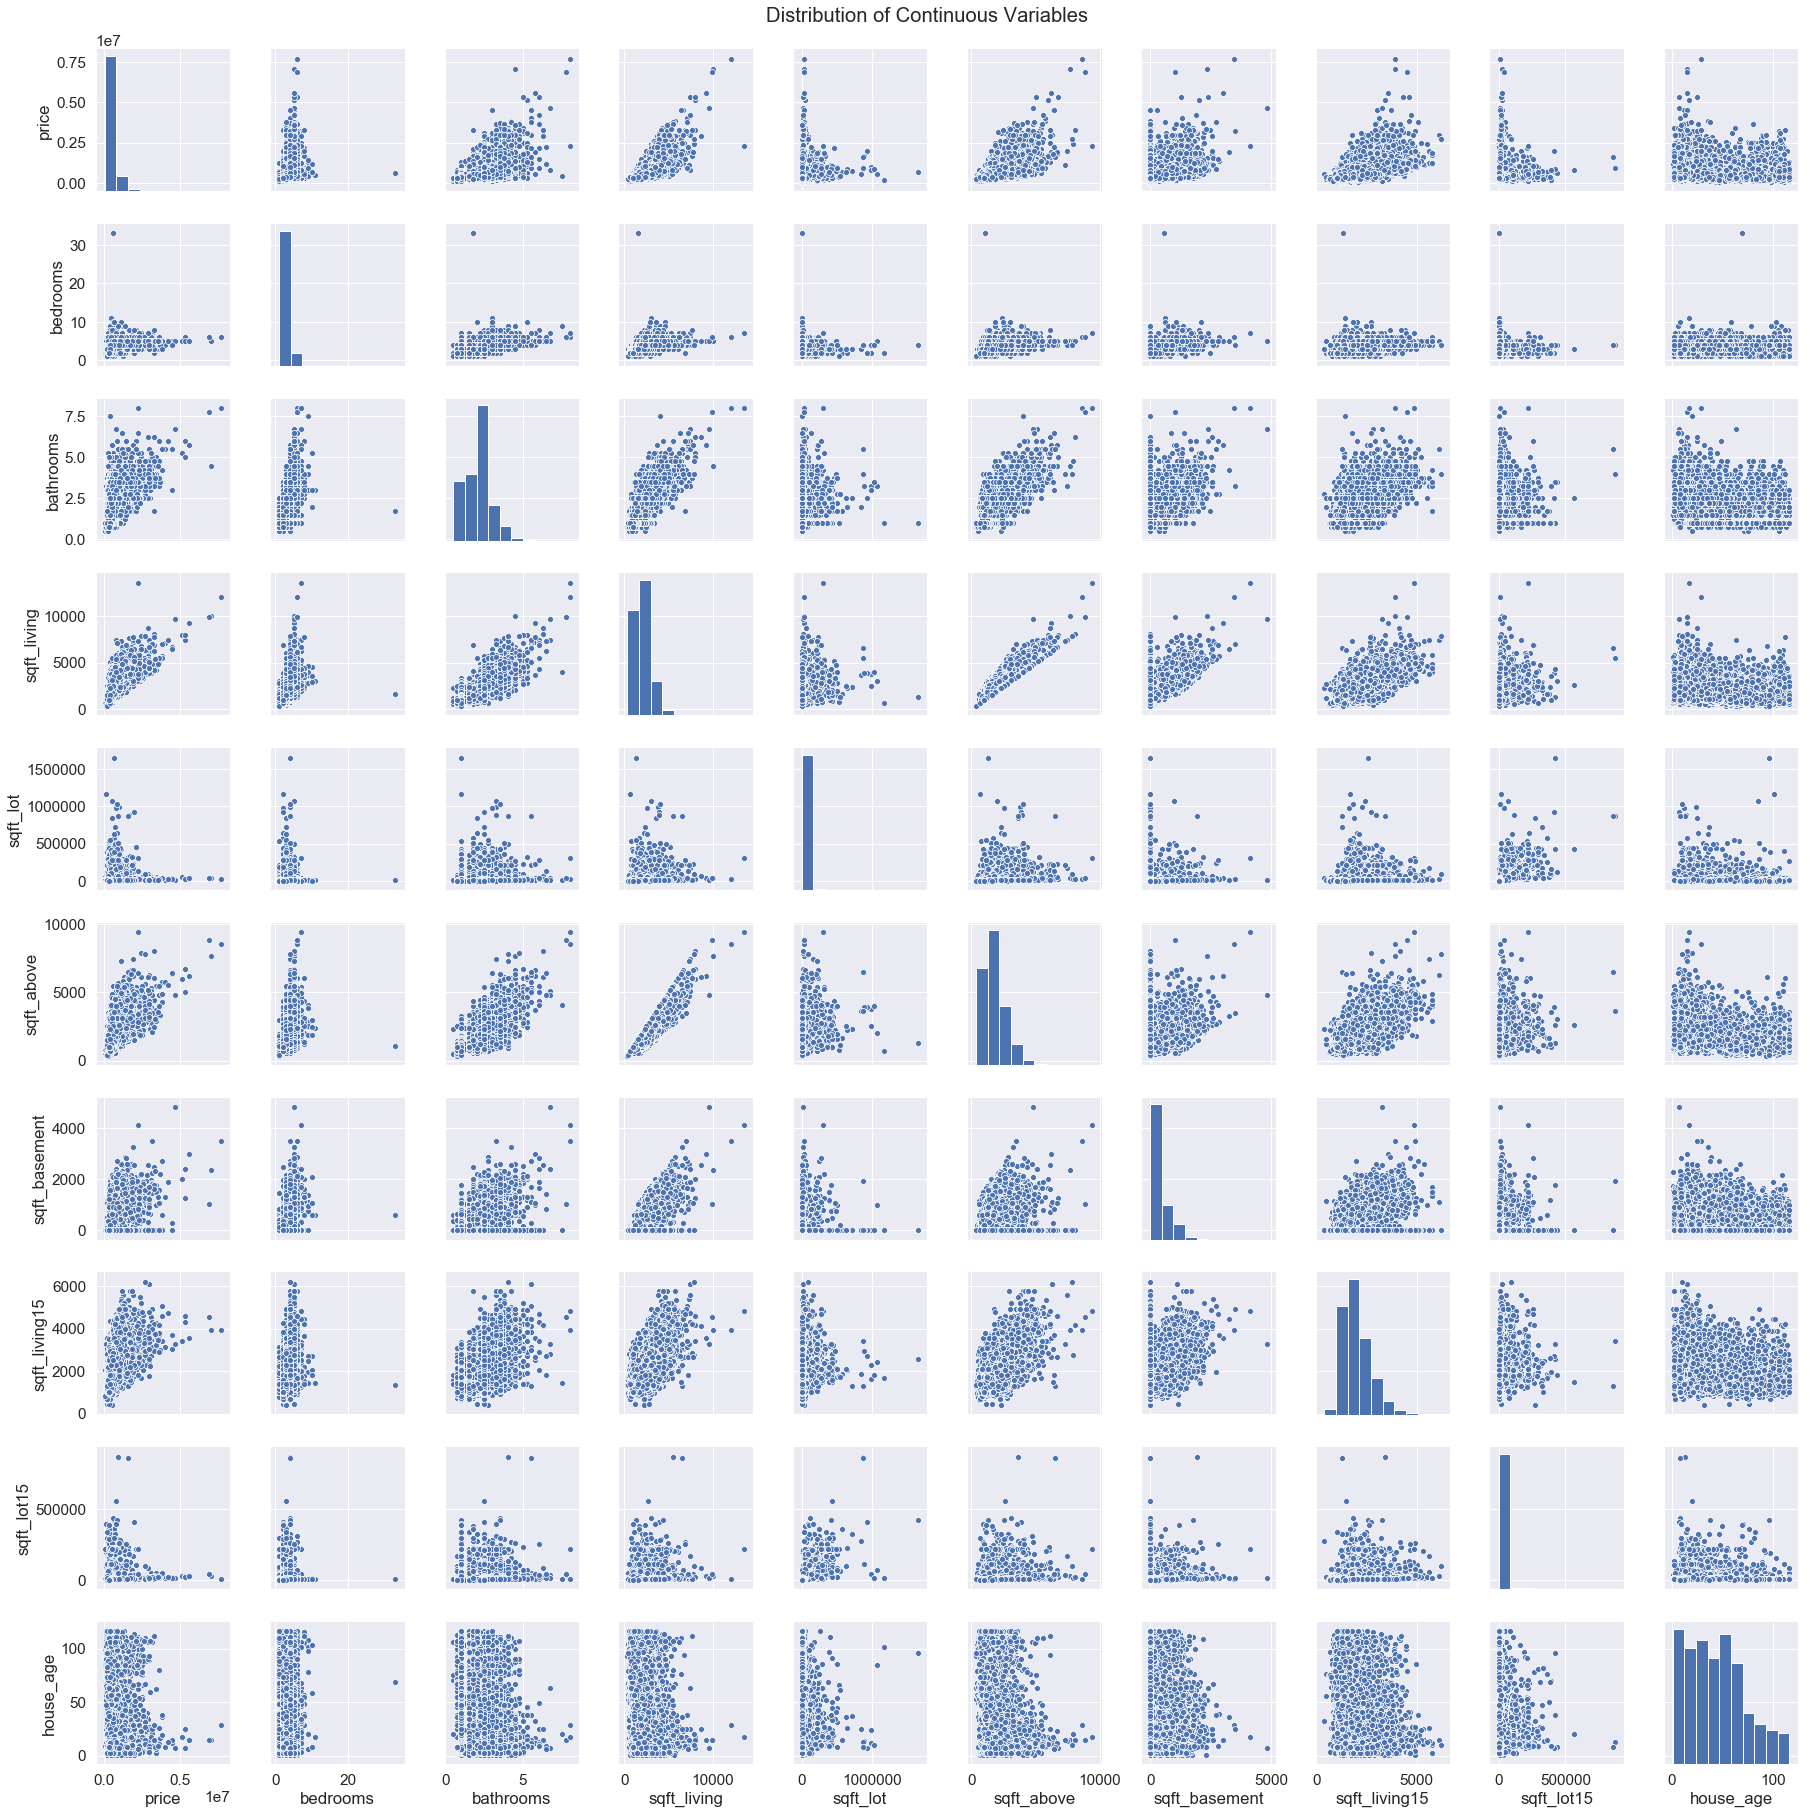

In [19]:
sns.set(font_scale = 1.4)
ax = sns.pairplot(df[continuous])
ax.fig.suptitle('Distribution of Continuous Variables', y = 1.01)
plt.show()

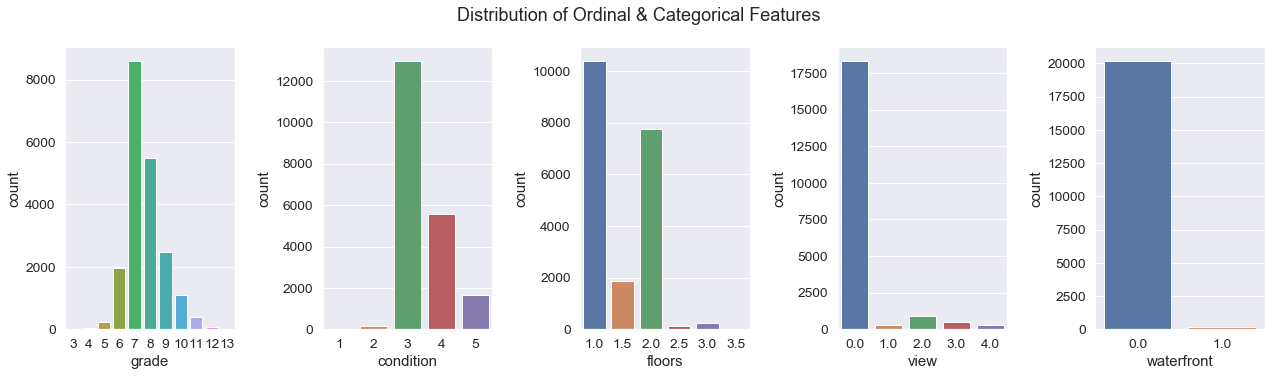

In [20]:
sns.set(font_scale = 1.25)
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols = 5, tight_layout = True, figsize = (18, 5))
ax = [ax1, ax2, ax3, ax4, ax5]
fig.suptitle('Distribution of Ordinal & Categorical Features', y =1.05)

for i in range(len(ordinal_and_categorical)):
    sns.countplot(x = ordinal_and_categorical[i], data = df, ax = ax[i])
plt.show()

As noted above, majority of variables above do not exhibit normal distribution. They do however, exhibit more of a positive skew distribution likely caused by outliers. That being said, variable normality is not a requirement for a linear regression model.
Only model errors are required to be normally distibuted.

Let's now check for outliers in the continuous columns and identify if they should or should not be removed. Using bins makes it easier to identify outliers.

In [21]:
for column in df[continuous].columns:
    print (df[column].value_counts(bins = 10, sort = False))
    print ('\n')

(70377.999, 840200.0]     17916
(840200.0, 1602400.0]      2044
(1602400.0, 2364600.0]      289
(2364600.0, 3126800.0]       89
(3126800.0, 3889000.0]       26
(3889000.0, 4651200.0]        4
(4651200.0, 5413400.0]        4
(5413400.0, 6175600.0]        1
(6175600.0, 6937800.0]        1
(6937800.0, 7700000.0]        2
Name: price, dtype: int64


(0.967, 4.2]    18517
(4.2, 7.4]       1836
(7.4, 10.6]        21
(10.6, 13.8]        1
(13.8, 17.0]        0
(17.0, 20.2]        0
(20.2, 23.4]        0
(23.4, 26.6]        0
(26.6, 29.8]        0
(29.8, 33.0]        1
Name: bedrooms, dtype: int64


(0.491, 1.25]    3827
(1.25, 2.0]      6109
(2.0, 2.75]      8034
(2.75, 3.5]      1866
(3.5, 4.25]       360
(4.25, 5.0]       138
(5.0, 5.75]        26
(5.75, 6.5]        10
(6.5, 7.25]         2
(7.25, 8.0]         4
Name: bathrooms, dtype: int64


(356.829, 1687.0]     7597
(1687.0, 3004.0]      9779
(3004.0, 4321.0]      2514
(4321.0, 5638.0]       386
(5638.0, 6955.0]        70
(6955.0, 8272.

Most outliers look fairly legitimate in comparison to other columns. Two row values however does raise the question of validity and through using some common sense (by sense checking value against other columns), these have been removed.

In [22]:
df.drop(df[df.bedrooms > 20].index, axis = 0, inplace = True)
df.drop(df[(df['sqft_lot'] > 1100000) & (df['sqft_lot'] <1200000)].index, axis = 0, inplace = True)

Now, the dataset should be ready for conducting further analysis and for implementing regression models.

## 1. The top 6 house features that are the most important in determining house prices

In order to understand feature importance to price, it is worth plotting a correlation matrix as per below.

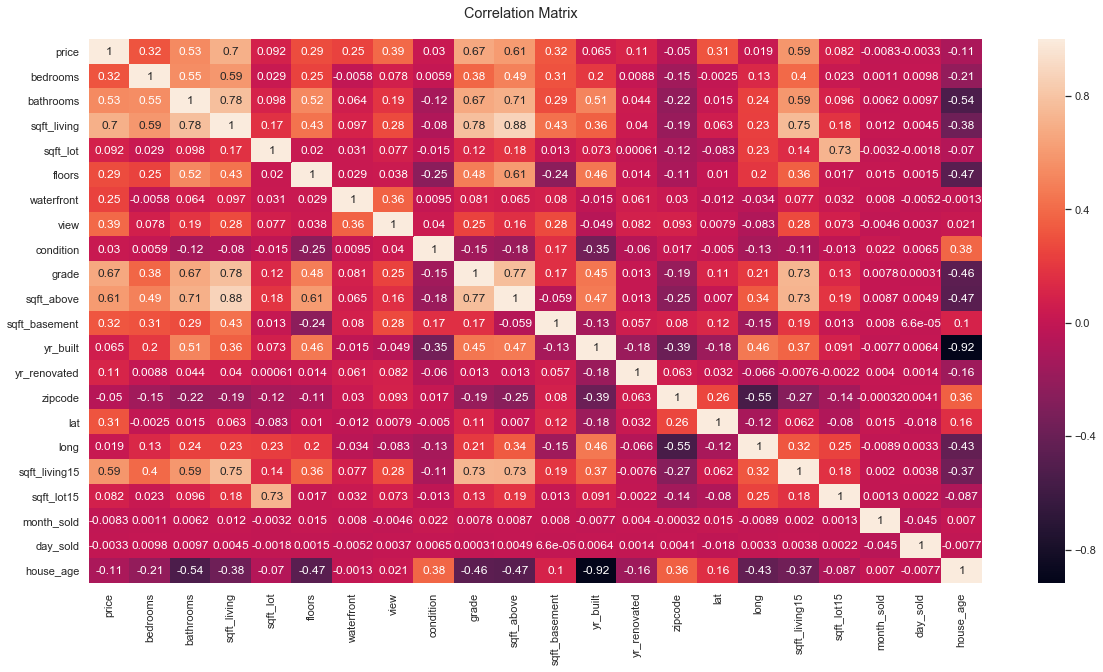

In [23]:
columns_to_drop = ['id', 'date', 'yr_built_vs_reno', 'price_per_sqft_living']
new_df = df.drop(columns_to_drop, axis = 1)
correlation_matrix = new_df.corr()

sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize = (20,10))
fig.suptitle('Correlation Matrix', x = 0.425, y = 0.925)
sns.heatmap(correlation_matrix, annot = True, ax = ax)
plt.show()

Now let's pick out the top 10 variables with the highest correlation to price.

In [24]:
x = correlation_matrix['price'].sort_values(ascending = False)
top10_price_correlation = x[:10]
top10_price_correlation

price           1.00
sqft_living     0.70
grade           0.67
sqft_above      0.61
sqft_living15   0.59
bathrooms       0.53
view            0.39
sqft_basement   0.32
bedrooms        0.32
lat             0.31
Name: price, dtype: float64

Now, having a general sense of the correlations, let's filter this down to the top 6 features (excluding the price column)

In [25]:
top6_price_correlation = top10_price_correlation[1:7]
top6_price_correlation

sqft_living     0.70
grade           0.67
sqft_above      0.61
sqft_living15   0.59
bathrooms       0.53
view            0.39
Name: price, dtype: float64

Great! From a simple linear regression perspective, we now have the top 6 features that are correlated to price which solves our first question! We can confirm this with simple scatter plots.

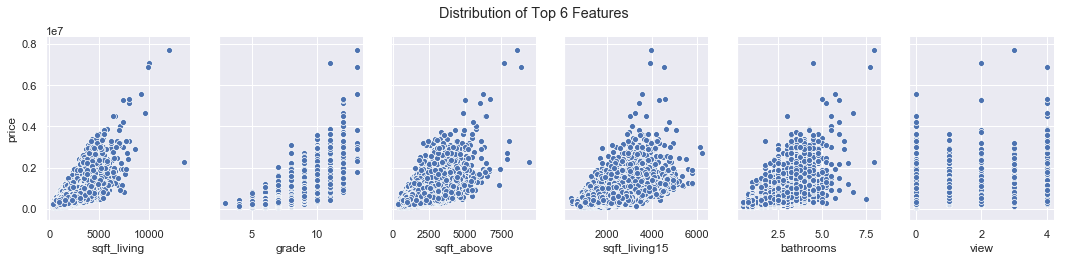

In [26]:
ax = sns.pairplot(data = df, y_vars=['price'], x_vars = top6_price_correlation.index)
ax.fig.suptitle('Distribution of Top 6 Features', y = 1)
ax.fig.set_size_inches(15,4)
plt.show()

As suspected, these features have some form of positive relationship with price. Note the 'view' column is fairly dubious, which can be confirmed by the fairly weak correlation at 0.39 and also can be viewed as an ordinal type feature, hence the stacked distribution

<!-- Kde is better than hist because its not affected by the number of bins

As you can see above, majority of features do not follow a normal distribution however this is not a condition for linear regression (errors need to be normally distributed - this can be done through a QQ plot) -->

Now that we have identify the top 6 variables, let's dig deeper into how each variable performs in a simple linear regression model.

As we are about to iterate a simple linear regression / OLS on each of the variable above, it would be useful to create a function to display the summary of attributes for each model.

Now let's put our function to the test on our top 6 features!

In [27]:
model = list(top6_price_correlation.index) + ['price']
df_model = df[model]

print ('Simple Linear Regression: ')
OLS_summary(top6_price_correlation, df_model, 'normal')

Simple Linear Regression: 


,feature,Pearson_r,Pearson_r2,R2,P_value,Coef_value,Coef_interval,F_value,T_value,Jacque-Bera,Resid. Skew,Resid. Kurtosis
0,sqft_living,0.70,0.49,0.49,0.00,283.19,"[279.26, 287.12]","19,944.54",141.23,"505,811.94",2.84,26.74
1,grade,0.67,0.45,0.45,0.00,"210,795.83","[207587.36, 214004.31]","16,583.42",128.78,"1,913,033.98",4.08,49.76
2,sqft_above,0.61,0.37,0.37,0.00,269.58,"[264.72, 274.44]","11,807.32",108.66,"684,124.99",3.29,30.61
3,sqft_living15,0.59,0.34,0.34,0.00,317.42,"[311.42, 323.43]","10,724.61",103.56,"1,810,103.35",4.25,48.39
4,bathrooms,0.53,0.28,0.28,0.00,"257,339.03","[251734.91, 262943.16]","8,101.10",90.01,"819,781.10",3.44,33.30
5,view,0.39,0.16,0.16,0.00,"191,108.33","[184990.88, 197225.77]","3,749.44",61.23,"968,321.97",3.63,35.98


Couple of things to notice:
    - R2 is exactly the same as the square of pearson's correlation (proves that model is running correctly)
    - All p-values are 0, representing the probability of getting a 0 coef_value (due to chance) is 0%
    - Model does not satisfy the assumptions of linear regression specifically on the residual of errors:
        - Proven by fairly high JB values (ie. more than 6 implies non-normal distribution)
        - Skew of more than 0 (all feature exhibitts positve skew)
        - Significantly high kurtosis (kurtosis of 3 is equivalent to a normal peak)


Let's try to improve model performance through either minmax scaling or log-transforming the features and target variable. Also, remember to remove the 'view' column when log transforming as it is not possible to log transform 0 values.

Starting off with minmax scaling which transforms values to between 0 and 1.

In [28]:
df_model_minmax = df_model.copy()

for feature in df_model_minmax.columns:
    d_min = df_model_minmax[feature].min()
    d_max = df_model_minmax[feature].max()
    df_model_minmax[feature] = (df_model_minmax[feature] - d_min) / (d_max - d_min)
    
df_model_minmax.columns = ['sqft_living_minmax', 'grade_minmax', 'sqft_above_minmax', 'sqft_living15_minmax', 'bathrooms_minmax', 'view_minmax', 'price_minmax']
top6_price_corr_minmax = df_model_minmax.corr()['price_minmax'].drop(['price_minmax'], axis = 0).sort_values(ascending = False)

print ('Simple Linear Regression with minmax scaling: ')
OLS_summary(top6_price_corr_minmax, df_model_minmax, 'minmax')

Simple Linear Regression with minmax scaling: 


,feature,Pearson_r,Pearson_r2,R2,P_value,Coef_value,Coef_interval,F_value,T_value,Jacque-Bera,Resid. Skew,Resid. Kurtosis
0,sqft_living_minmax,0.70,0.49,0.49,0.00,0.49,"[0.48, 0.5]","19,944.54",141.23,"505,811.94",2.84,26.74
1,grade_minmax,0.67,0.45,0.45,0.00,0.28,"[0.27, 0.28]","16,583.42",128.78,"1,913,033.98",4.08,49.76
2,sqft_above_minmax,0.61,0.37,0.37,0.00,0.32,"[0.31, 0.33]","11,807.32",108.66,"684,124.99",3.29,30.61
3,sqft_living15_minmax,0.59,0.34,0.34,0.00,0.24,"[0.24, 0.25]","10,724.61",103.56,"1,810,103.35",4.25,48.39
4,bathrooms_minmax,0.53,0.28,0.28,0.00,0.25,"[0.25, 0.26]","8,101.10",90.01,"819,781.10",3.44,33.30
5,view_minmax,0.39,0.16,0.16,0.00,0.10,"[0.1, 0.1]","3,749.44",61.23,"968,321.97",3.63,35.98


Looks like there are no improvements in the model apart from smaller coef_values and narrower intervals.

Moving on with log transforming our features and target variable.

In [29]:
df_model_log = np.log(df_model)
df_model_log.columns = ['sqft_living_log', 'grade_log', 'sqft_above_log', 'sqft_living15_log', 'bathrooms_log', 'view_log', 'price_log']
top5_log_corr = df_model_log.corr()['price_log'].drop(['view_log','price_log'], axis = 0).sort_values(ascending = False)

print ('Simple Linear Regression with log transformation: ')
OLS_summary(top5_log_corr, df_model_log, 'log')

Simple Linear Regression with log transformation: 


,feature,Pearson_r,Pearson_r2,R2,P_value,Coef_value,Coef_interval,F_value,T_value,Jacque-Bera,Resid. Skew,Resid. Kurtosis
0,grade_log,0.70,0.48,0.48,0.00,2.46,"[2.42, 2.49]","19,099.02",138.20,175.02,0.20,3.20
1,sqft_living_log,0.68,0.46,0.46,0.00,0.85,"[0.83, 0.86]","17,355.12",131.74,144.86,0.18,2.78
2,sqft_living15_log,0.61,0.38,0.38,0.00,1.00,"[0.98, 1.01]","12,322.94",111.01,531.23,0.32,3.46
3,sqft_above_log,0.59,0.35,0.35,0.00,0.73,"[0.71, 0.74]","10,829.17",104.06,171.51,0.21,2.87
4,bathrooms_log,0.53,0.28,0.28,0.00,0.71,"[0.69, 0.72]","7,754.04",88.06,286.89,0.29,3.07


Comparing both log-transform and non-log transform data, we can see improvements in:
    - R2 values (except sqft_living) though is fairly marginal
    - Narrower confidence_interval
    - More uniform residuals as seen by the JB, skewness and kurtosis values
    
Let's now visually take the 'sqft_living' feature across both untransformed and log transformed and plot them to visually check the fitted model and the residuals as well. We can use the statsmodel's .graphics.plot_regress_exog method for this.

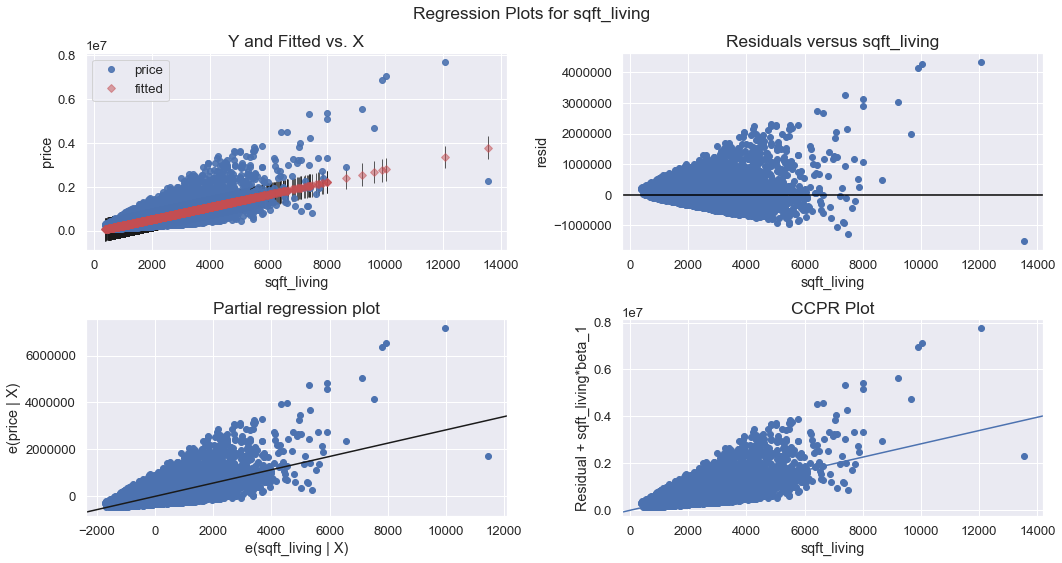

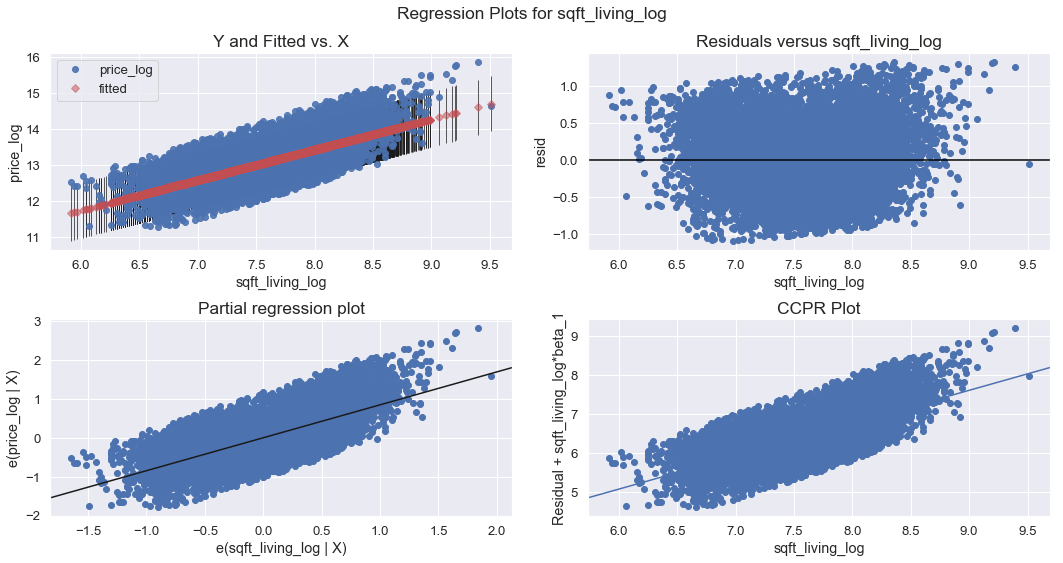

In [30]:
example_features = ['sqft_living', 'sqft_living_log']
target_features = ['price', 'price_log']
example_models = [df_model, df_model_log]
ols_models = []

for i in range(len(example_features)):
    f = target_features[i] + '~' + example_features[i]
    model = ols(formula = f, data = example_models[i]).fit()
    ols_models.append(model)

sns.set(font_scale = 1.2)
    
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(ols_models[0], example_features[0], fig=fig)
plt.show()

print('\n')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(ols_models[1], example_features[1], fig=fig)
plt.show()

Once conclusion that can be made is that the residuals for the log-transformed model is now more uniform across the spectrum of the log feature.

### Good stuff, now we have our top 6 features which should hopefully answer the first question!

Maybe it is also worth digging deeper by running a Multiple Linear Regression model which includes the rest of the remaining features to check if there are any improvement in R2 values.

The first step ahead of conducting a multiple linear regression model is to reduce the impact of multicollinearity between independent variables. As such, let's drop any features with > 0.8 correlation.

We can use the previous correlation_matrix and subset the table to the top half triangle which allows us to filter for our correlation threshold.

In [31]:
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k = 1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop

['sqft_above']

On a 0.8 correlation threshold, we have singled out the 'sqft_above' feature. We can drop the this feature from the rest of the features ahead of fitting our multiple regression model.

In [32]:
multiple_features = list(upper.drop(to_drop, axis = 1).columns)
del (multiple_features[0])

str_join = '+'.join(multiple_features)
f = 'price~' + str_join
model = ols(formula = f, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2370.
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                        08:22:39   Log-Likelihood:            -2.7803e+05
No. Observations:               20374   AIC:                         5.561e+05
Df Residuals:                   20353   BIC:                         5.563e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.088e+07   3.08e+06      3.529      0.000    4.84e+06    1.69e+07
bedrooms      -3.926e+04   2067.448    -18.992      0.000   -4.33e+04   -3.52e+04
bathrooms      4.457e+04   3454.940     12.902      0.000    3.78e+04    5.13e+04
sqft_living     191.4044      3.915     48.891      0.000     183.731     199.078
sqft_lot          0.0976      0.051      1.924      0.054      -0.002       0.197
floors        -4163.1935   4056.591     -1.026      0.305   -1.21e+04    3788.053
waterfront     5.267e+05   1.74e+04     30.328      0.000    4.93e+05    5.61e+05
view           5.844e+04   2196.321     26.607      0.000    5.41e+04    6.27e+04
condition      2.741e+04   2427.516     11.290      0.000    2.26e+04    3.22e+04
grade          9.387e+04   2265.499     41.433      0.000    8.94e+04    9.83e+04
sqft_basement   -41.3919      4.622     -8.956      0.000     -50.451     -32.333
yr_built      -2861.5975    240.382    -11.904      0.000   -3332.766   -2390.429
yr_renovated     19.5056      6.947      2.808      0.005       5.890      33.121
zipcode        -612.0716     34.184    -17.905      0.000    -679.076    -545.067
lat            5.978e+05   1.11e+04     53.896      0.000    5.76e+05     6.2e+05
long          -2.103e+05   1.37e+04    -15.401      0.000   -2.37e+05   -1.84e+05
sqft_living15    21.9093      3.568      6.141      0.000      14.916      28.903
sqft_lot15       -0.3776      0.077     -4.927      0.000      -0.528      -0.227
month_sold    -2850.8259    461.453     -6.178      0.000   -3755.310   -1946.342
day_sold       -203.1655    981.839     -0.207      0.836   -2127.649    1721.318
house_age       -78.9208    243.828     -0.324      0.746    -556.843     399.002
==============================================================================
Omnibus:                    17105.630   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1616434.672
Skew:                           3.513   Prob(JB):                         0.00
Kurtosis:                      46.067   Cond. No.                     2.17e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As seen above, the multiple regression model generated a fairly reasonable R2 figure of 70% however there still remains strong collinearity between sum of out predictor variables as warned by the condition number above. 

One way to solve this is by using a rescaling our predictor and target features to between 0 and 1 aka min_max scaling. Let's do this manually (rather than using the sklearn package) and re-run our model.

In [33]:
df_model2 = df.copy()

for feature in multiple_features:
    d_min = df_model2[feature].min()
    d_max = df_model2[feature].max()
    df_model2[feature] = (df_model2[feature] - d_min) / (d_max - d_min)

price_min = df_model2['price'].min()
price_max = df_model2['price'].max()
df_model2['price'] = (df_model2['price'] - price_min) / (price_max - price_min)

df_model2

str_join = '+'.join(multiple_features)
f = 'price~' + str_join
model = ols(formula = f, data = df_model2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2370.
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                        08:22:40   Log-Likelihood:                 44831.
No. Observations:               20374   AIC:                        -8.962e+04
Df Residuals:                   20353   BIC:                        -8.945e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0387      0.004     -9.837      0.000      -0.046      -0.031
bedrooms         -0.0515      0.003    -18.992      0.000      -0.057      -0.046
bathrooms         0.0439      0.003     12.902      0.000       0.037       0.051
sqft_living       0.3307      0.007     48.891      0.000       0.317       0.344
sqft_lot          0.0211      0.011      1.924      0.054      -0.000       0.043
floors           -0.0014      0.001     -1.026      0.305      -0.004       0.001
waterfront        0.0691      0.002     30.328      0.000       0.065       0.074
view              0.0307      0.001     26.607      0.000       0.028       0.033
condition         0.0144      0.001     11.290      0.000       0.012       0.017
grade             0.1232      0.003     41.433      0.000       0.117       0.129
sqft_basement    -0.0262      0.003     -8.956      0.000      -0.032      -0.020
yr_built         -0.0432      0.004    -11.904      0.000      -0.050      -0.036
yr_renovated      0.0052      0.002      2.808      0.005       0.002       0.009
zipcode          -0.0159      0.001    -17.905      0.000      -0.018      -0.014
lat               0.0488      0.001     53.896      0.000       0.047       0.051
long             -0.0332      0.002    -15.401      0.000      -0.037      -0.029
sqft_living15     0.0167      0.003      6.141      0.000       0.011       0.022
sqft_lot15       -0.0431      0.009     -4.927      0.000      -0.060      -0.026
month_sold       -0.0041      0.001     -6.178      0.000      -0.005      -0.003
day_sold         -0.0002      0.001     -0.207      0.836      -0.002       0.001
house_age        -0.0012      0.004     -0.324      0.746      -0.008       0.006
==============================================================================
Omnibus:                    17105.630   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1616434.672
Skew:                           3.513   Prob(JB):                         0.00
Kurtosis:                      46.067   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can see, the condition number has now reduced but still more than the 30 figure threshold. Another problem remains, there are several features with p_values of more than 0.05 (day_sold, house_age and floors). Running them on the side / offline however does not provide any improvement in the model. 

Now, let's also visualize all the features and rank them by their coeficient values.

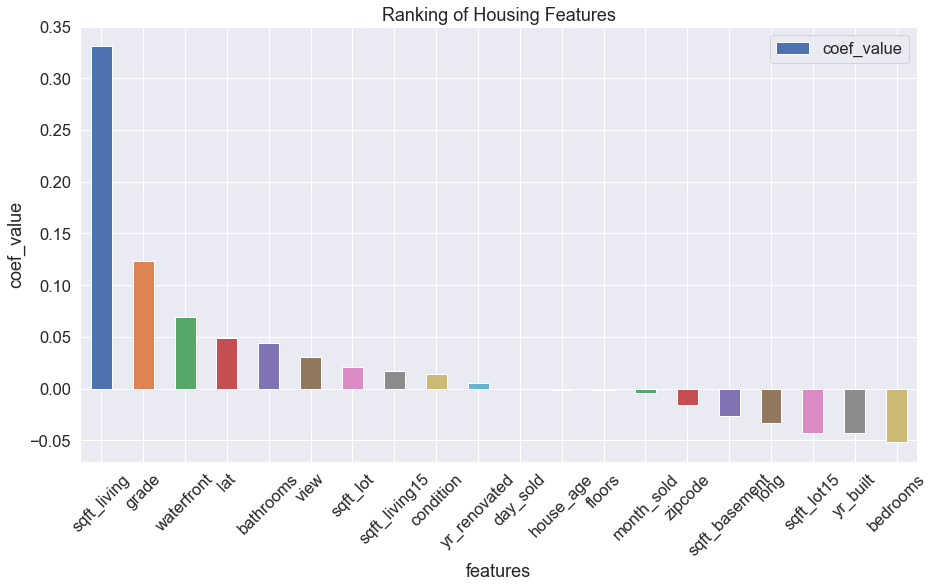

In [34]:
model_params = model.params
x = model_params.reset_index()
x.columns = ['features', 'coef_value']
x.drop(0, axis = 0, inplace = True)
x.sort_values(by = 'coef_value', ascending = False, inplace = True)

sns.set(font_scale = 1.5)
ax = x.plot.bar(x = 'features', y = 'coef_value', figsize = (15, 8), title = 'Ranking of Housing Features')
plt.ylabel('coef_value')
plt.xticks(rotation = 45)
plt.show()

Here, we have all the prediction variables from the dataset and ranked them according to coefficient values. We need to be cautious in interpreting this as one might think the features to the right (neg coef) are less important. This is incorrect, as the features on the right means they have negative relationship to price. The features in the middle (house_age, day_sold, floors) all have close to 0 coef suggesting no significant relationship to price (hence the p_value of > 0.05)

Another issue encountered here is that the first 6 features do not tie in with out intial top 6 features (when we did the simple linear regression exercise). For example, the 'waterfront and 'lat' were not previously extracted as their sole correlation to price was not that high. However, the effects of combining them into a larger multiple model results in a better ranking. Nonetheless we can confirm that our earlier top 6 features are at least within the top 8!


Also the multiple linear regression model is probably not the best model for the task given the assumptions have not been satisfied:
- still remains significant multicollinearity
- non-normal error distribution

Other potential issues:
- the possibility of over fitting as we've not done any train-test split / cross validation here 
- interpreting the coef values can be quite misleading as we've done some feature scaling here
- dropping more features which higher correlation (set initally at 0.8) may reduce R2, hence need to find balance

## 2. What are the average price difference between waterfront and non-waterfront houses

In order to have a general feel, let's plot a scatter plot of longitude and latitude, with a heatmap based on the 'price_per_square_foot_living' column. Also, let's use the 'jet' as color map for better visibility.

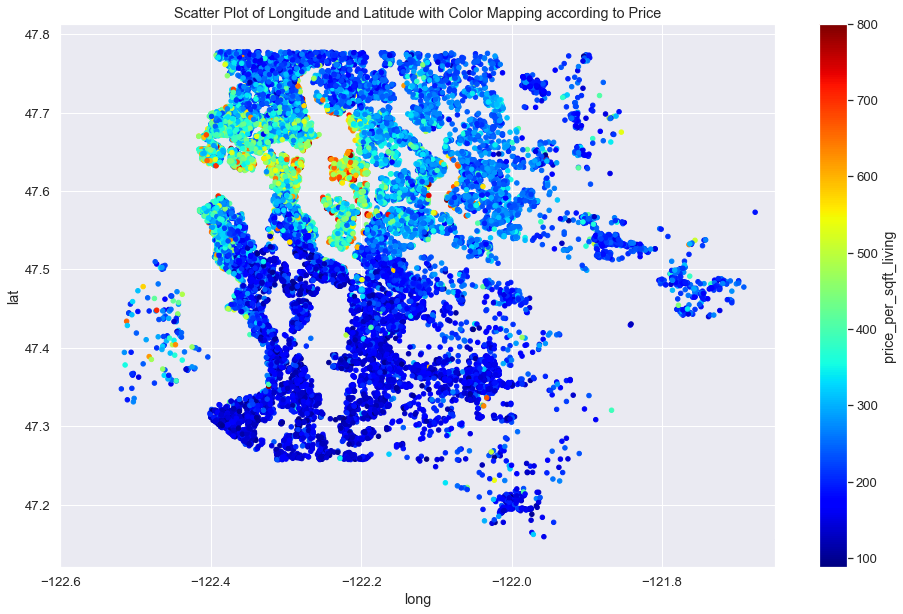

In [35]:
sns.set(font_scale = 1.2)

df.plot(kind = 'scatter', 
        x = 'long', 
        y = 'lat', 
        figsize = (16,10), 
        c= 'price_per_sqft_living', 
        cmap = 'jet', 
        colorbar = True, 
        sharex = False,
       title = 'Scatter Plot of Longitude and Latitude with Color Mapping according to Price',
       xlim = [-122.6, -121.65])
plt.show()

As per above, waterfront houses tend to have lighter color density (and towards red). We can identify this just by looking at houses near beds of water. Would caveat that the above plot is not a true representative of the Kings County region but only serves as an approximation noting that there are areas without any house sales during the timeframe of the available data.


To identify the average price difference in waterhouse and non-waterhouse properties, it is best to refer to the below.

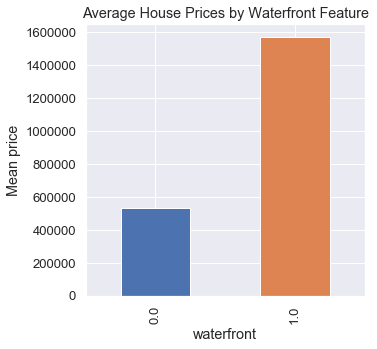

In [36]:
waterfront_general = df.groupby('waterfront')['price'].mean()
waterfront_general.plot.bar(figsize = (5,5), title = 'Average House Prices by Waterfront Feature')
plt.ylabel('Mean price')
plt.show()

On average, waterfront properties cost marginally more than $1m than non-waterfront properties. 

For deeper analysis on waterfront properties, we can plot the general price differences according to our 6 main features identified earlier. For better visualizations, we used the previously created binned columns for the 'sqft' type columns.

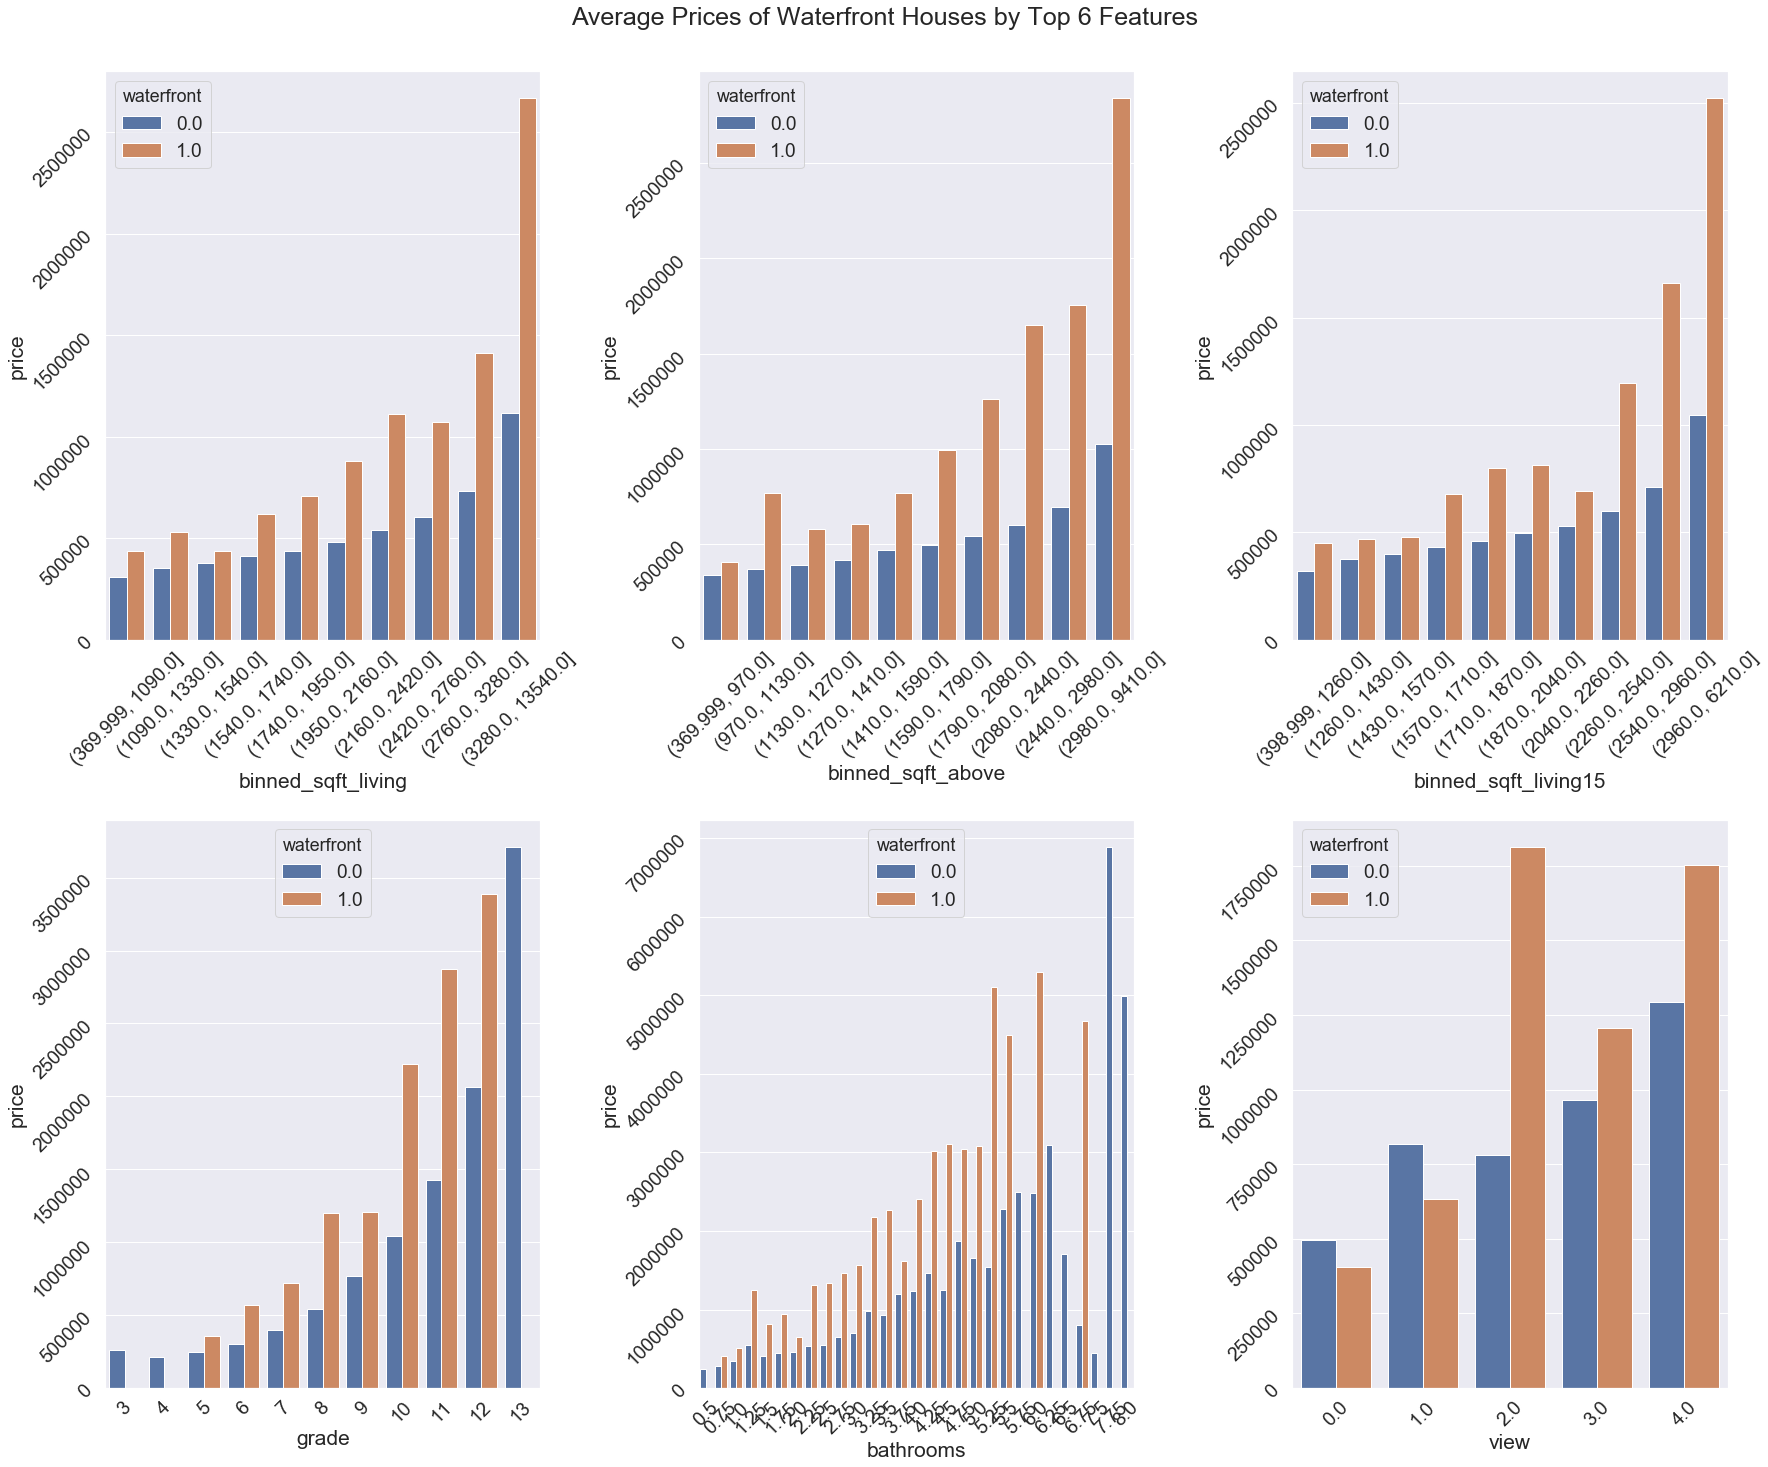

In [37]:
top6_price_correlation_list = top6_price_correlation.index.tolist()
final = ['binned_sqft_living', 'binned_sqft_above', 'binned_sqft_living15'] + top6_price_correlation_list
del (final[5:7])
del (final[3])

groupby_list = []
for feature in final:
    groupby_list.append(df.groupby(['waterfront', feature])['price'].mean().reset_index())

sns.set(font_scale = 1.75)

fig, axes = plt.subplots(2, 3, tight_layout = True, figsize = (25,20))
fig.suptitle('Average Prices of Waterfront Houses by Top 6 Features', y = 1.025)

ax = [axes[0, 0], axes[0, 1], axes[0, 2], axes[1, 0], axes[1, 1], axes[1, 2]]

for i in range(len(groupby_list)):
    sns.barplot(x = final[i] , y = 'price', data = groupby_list[i], hue = 'waterfront', ax = ax[i])
    ax[i].tick_params(labelrotation = 45)

There seems to be a general trend across all features; waterfront properties attract higher prices across majority of unique elements in each feature.

Would however point out that, waterfront properties only represent a minor proportion of the total dataset and as such users' shouldn't put significant weight into the above analysis.

Great, we have now answered the second question!

## 3. Is timing important when selling or buying a house? Is there any relationship between the average price and the average number of transactions over the data period

Let's now have a look at our third question. One easy way to do this is by plotting average number of transactions by month and day to determine if there are any meaningful insights to be determined at different time periods (by month and day).

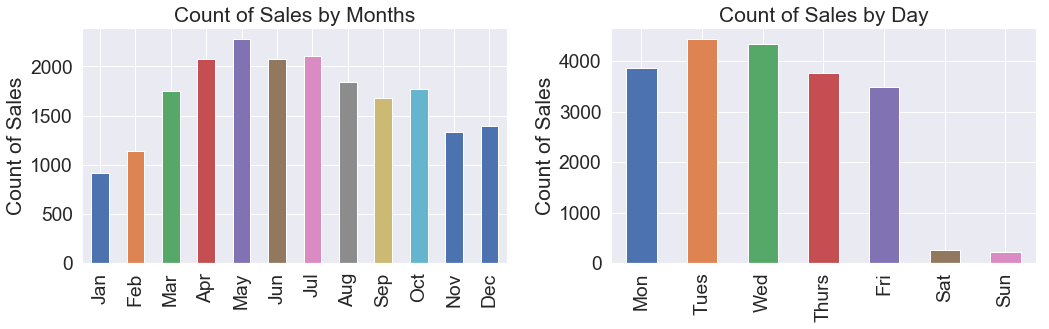

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5), tight_layout = True)

df.month_sold.value_counts(sort = False).plot(kind = 'bar', ax = ax1, title = 'Count of Sales by Months')
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax1.set_ylabel('Count of Sales')

df.day_sold.value_counts(sort = False).plot(kind = 'bar', ax = ax2, title = 'Count of Sales by Day')
ax2.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
ax2.set_ylabel('Count of Sales')

plt.show()

Whilst not a definite conclusion, the month of 'May' tends to have higher activity possibly due to various factors:
     - employee bonuses are typically paid in March / April, leading to an uptick in house transactions in May
     - warmer months meaning more viewings and a better conversion rate
     - lower purchases in January possibly due to higher Christmas season spending
    
Referring to the 'day' count chart, we can conclude that weekend attracts the least number of transactions possibly due to:
    - Not many property agents working during weekends
    - There might be potential for sale agreement during the weekend but only signed once funds have been transferred. For such large amounts, banks will typically take a day or two to process the transfer request
    
** Important to highlight that above reasons are just inferences and not exhaustive

Let's now take a deeper look at if there's any relationship between average price and average number of transactions over the data period

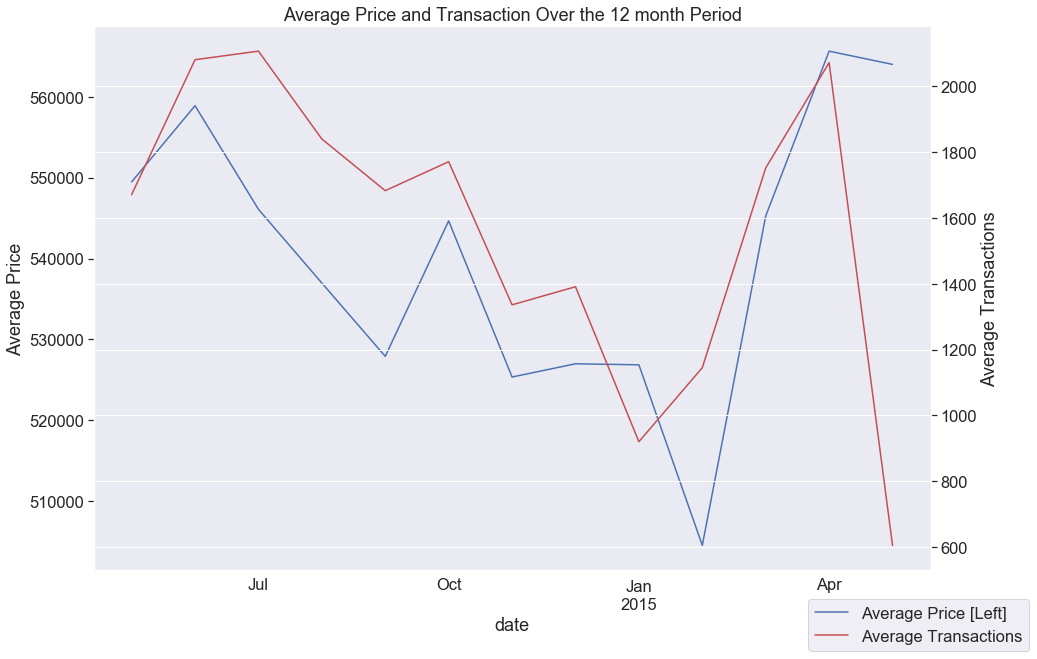

In [39]:
from pylab import ylabel

w = df.groupby(df.date.dt.to_period('M'))['price'].mean()
w1 = w.reset_index()
w1

z = df.groupby(df.date.dt.to_period('M'))['date'].count()
w1['Average Transactions'] = z.values

sns.set(font_scale = 1.5)
ax = w1.plot(x = 'date', y = 'price', legend = False, figsize = (15,10), grid = False)
ax.yaxis.tick_left()
ylabel('Average Price')

ax2 = ax.twinx()
w1.plot(x = 'date', y = 'Average Transactions', ax =ax2, color = 'r', legend = False)
ax2.yaxis.tick_right()
ylabel('Average Transactions')

ax.figure.legend(('Average Price [Left]', 'Average Transactions'), loc = 'lower right')
ax.set_title('Average Price and Transaction Over the 12 month Period')
plt.show()

The above shows two seperate line plots over the time period of May 2014 to May 2015. The line in red represents the average price and the blue represents the average number of transaction, both over the same time period.

All the way up to April 2015, we can see a clear relationship between both variables. As the average transaction declines over the year, we can also see a decline in the average prices. Feels like a simple economics 101, lower demand, lower prices. 

One shortfall of this analysis is that the graph does not necessarily tell if there is a time lag between a drop in number of transactions and the drop in average prices. Also, there seems to be a huge mismatch post the month of April-15. 

Another shortfall encountered is the short time span here (12 months). In the event we do get data for longer time periods, better analysis can be conducted. For example, a 12 month rolling average figure could be used to smoothen the trend line.

## 4. Identify the avg. price and number of transactions per zipcode. Determine if having higher activity in a particular zipcode drive up prices

Now let's have a look at average prices and average number of transactions per zipcode. Subsequently, we can try and identify if there are any meaningful relationship between them.

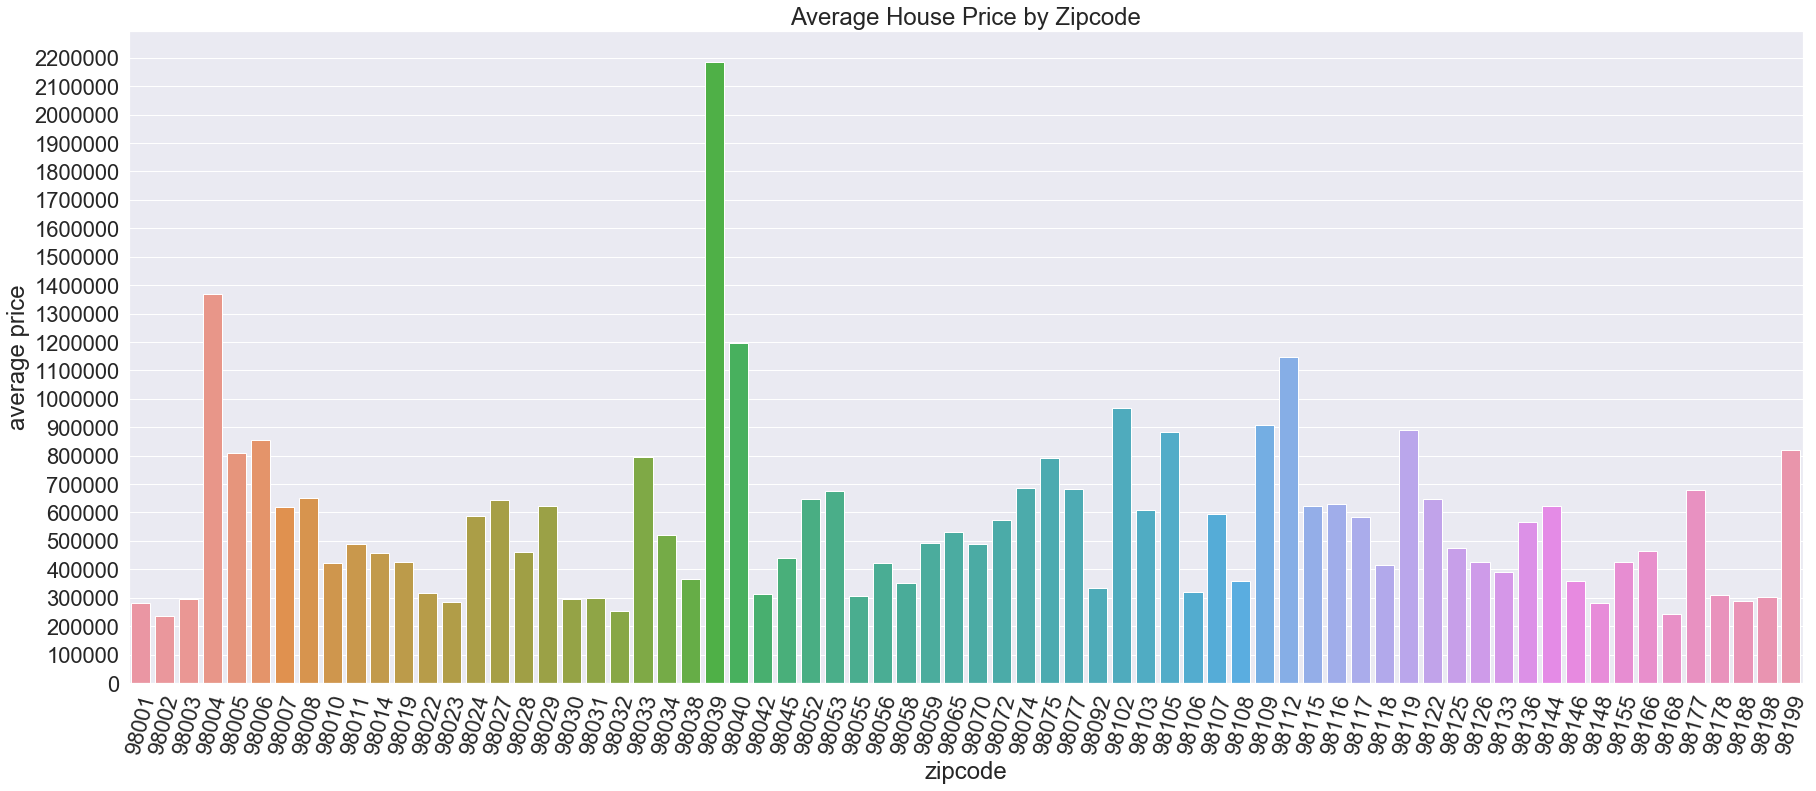

In [40]:
zipcode = df.groupby('zipcode')['price'].mean().reset_index()

sns.set(font_scale = 2)
graph = plt.figure(figsize = (30,12))
graph = sns.barplot(x ='zipcode', y = 'price', data = zipcode)
graph.set_xticklabels(zipcode['zipcode'], rotation = 75)
graph.set_ylabel('average price')
graph.yaxis.set_major_locator(ticker.MultipleLocator(100000))
graph.set_title('Average House Price by Zipcode')
plt.show()

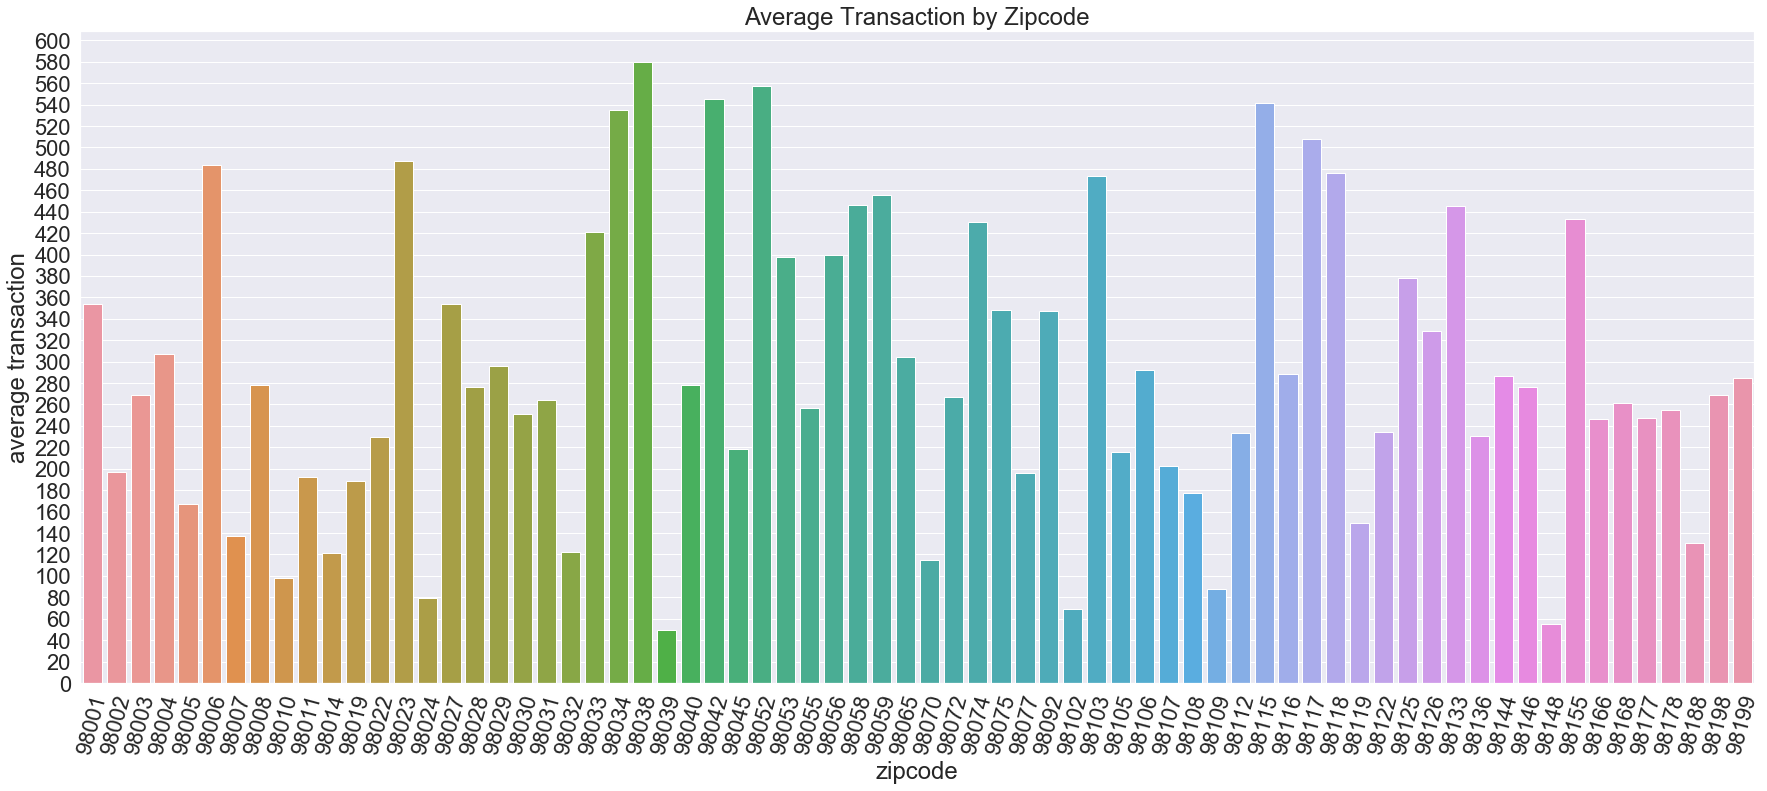

In [41]:
v = df.zipcode.value_counts()
x = v.reset_index()
x.columns = ['zipcode', 'count']
x.sort_values(by = 'zipcode', inplace = True)

sns.set(font_scale = 2)
ax = plt.figure(figsize = (30,12))
ax = sns.barplot(x = 'zipcode', y = 'count', data = x)
ax.set_xticklabels(x.zipcode, rotation =75)
ax.set_ylabel('average transaction')
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax.set_title('Average Transaction by Zipcode')

plt.show()

Given that we got both the average price and average activity per zipcode, let's dig deeper to see if there's any meaningful relationship between them.

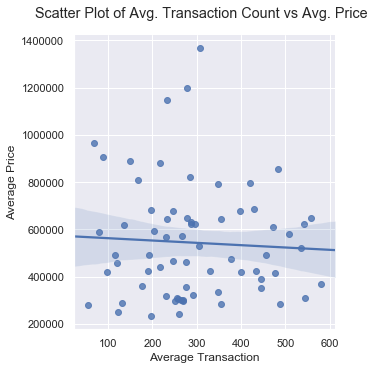

In [42]:
x = df.zipcode.value_counts().reset_index()
x.columns = ['zipcode', 'count']

new = pd.merge(zipcode, x, on = 'zipcode')
new = new.drop(new[new.price > 2000000].index, axis = 0)

sns.set(font_scale = 1)
ax =sns.lmplot(x = 'count', y='price', data =new)
plt.ylabel('Average Price')
plt.xlabel('Average Transaction')
ax.fig.suptitle('Scatter Plot of Avg. Transaction Count vs Avg. Price', y =1.025, x = 0.575)
plt.show()

As per above, running a simple linear regression between average price and average number of transaction shows no significant relationship between them. As such we can conclude that higher activity in a zipcode does not necessarily mean higher prices / drive up prices. 

Purely for learning purposes, we've generated an interactive map using the folumn package, enabling users to click on their respective postcodes and figure out the average price in the region.

### That is all for now and thank you for taking the time to review this notebook.

Below is an interactive map of the average prices of all the postcode within the area.

In [43]:
import folium

coordinates = [df.lat[0], df.long[0]]
x = df.groupby('zipcode')[['lat', 'long', 'price']].mean().sort_values(by = 'price', ascending = False)
y = x.reset_index()
m = folium.Map(
    location = coordinates, 
    zoom_start = 10
)

tooltip = 'Click me!'

for i in y.index:
    folium.Marker([y.lat[i], y.long[i]], 
                  popup = 'Zipcode: {}, Avg Price: {}'.format(y.zipcode[i], int(y.price[i])), 
                  tooltip = tooltip,
                  icon = folium.Icon(icon = 'cloud')).add_to(m)

display(m)